In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
folder = "archive/data"
csv = folder + "/countries-aggregated.csv"

df = pd.read_csv(csv)


<bound method DataFrame.count of               Date      Country  Confirmed  Recovered  Deaths
0       2020-01-22  Afghanistan          0          0       0
1       2020-01-23  Afghanistan          0          0       0
2       2020-01-24  Afghanistan          0          0       0
3       2020-01-25  Afghanistan          0          0       0
4       2020-01-26  Afghanistan          0          0       0
...            ...          ...        ...        ...     ...
161563  2022-04-12     Zimbabwe     247094          0    5460
161564  2022-04-13     Zimbabwe     247160          0    5460
161565  2022-04-14     Zimbabwe     247208          0    5462
161566  2022-04-15     Zimbabwe     247237          0    5462
161567  2022-04-16     Zimbabwe     247237          0    5462

[161568 rows x 5 columns]>

### 1. Seperate each csv by country

In [ ]:
output_dir = "country_data"
os.makedirs(output_dir, exist_ok=True)

countries = df['Country'].unique()
print(f"{len(countries)} unique countries")

for country in countries:
    country_df = df[df['Country'] == country]
    name = country.replace(' ', '_').replace('/', '_')   #Remove spaces
    output_file = f"{output_dir}/{name}.csv"
    country_df.to_csv(output_file, index=False)
    print(f"Saved {country} data: {len(country_df)} rows to {output_file}")

In [ ]:
for country_file in os.listdir(output_dir):
    file_path = os.path.join(output_dir, country_file)
    country_df = pd.read_csv(file_path)

    country_df['Confirmed_daily'] = country_df['Confirmed'].diff().fillna(0).astype(int)
    country_df['Deaths_daily'] = country_df['Deaths'].diff().fillna(0).astype(int)
    country_df['Confirmed_daily_seven_rolling'] = country_df['Confirmed_daily'].rolling(window=7).mean().fillna(0).round().astype(int)
    country_df['Deaths_daily_seven_rolling'] = country_df['Deaths_daily'].rolling(window=7).mean().fillna(0).round().astype(int)
    if 'Recovered' in country_df.columns:
        country_df = country_df.drop(columns=['Recovered'])     #Recovered has some issues with missing data
    
    country_df.to_csv(file_path, index=False)

In [ ]:
global_total = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum'
}).reset_index()

global_total['Confirmed_daily'] = global_total['Confirmed'].diff().fillna(0).astype(int)
global_total['Deaths_daily'] = global_total['Deaths'].diff().fillna(0).astype(int)
global_total['Confirmed_daily_seven_rolling'] = global_total['Confirmed_daily'].rolling(window=7).mean().fillna(0).round().astype(int)
global_total['Deaths_daily_seven_rolling'] = global_total['Deaths_daily'].rolling(window=7).mean().fillna(0).round().astype(int)

global_total.to_csv(f"global_total.csv", index=False)
print(global_total.head())

         Date  Confirmed  Deaths  Confirmed_daily  Deaths_daily  \
0  2020-01-22        557      17                0             0   
1  2020-01-23        657      18              100             1   
2  2020-01-24        944      26              287             8   
3  2020-01-25       1437      42              493            16   
4  2020-01-26       2120      56              683            14   

   Confirmed_daily_seven_rolling  Deaths_daily_seven_rolling  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  


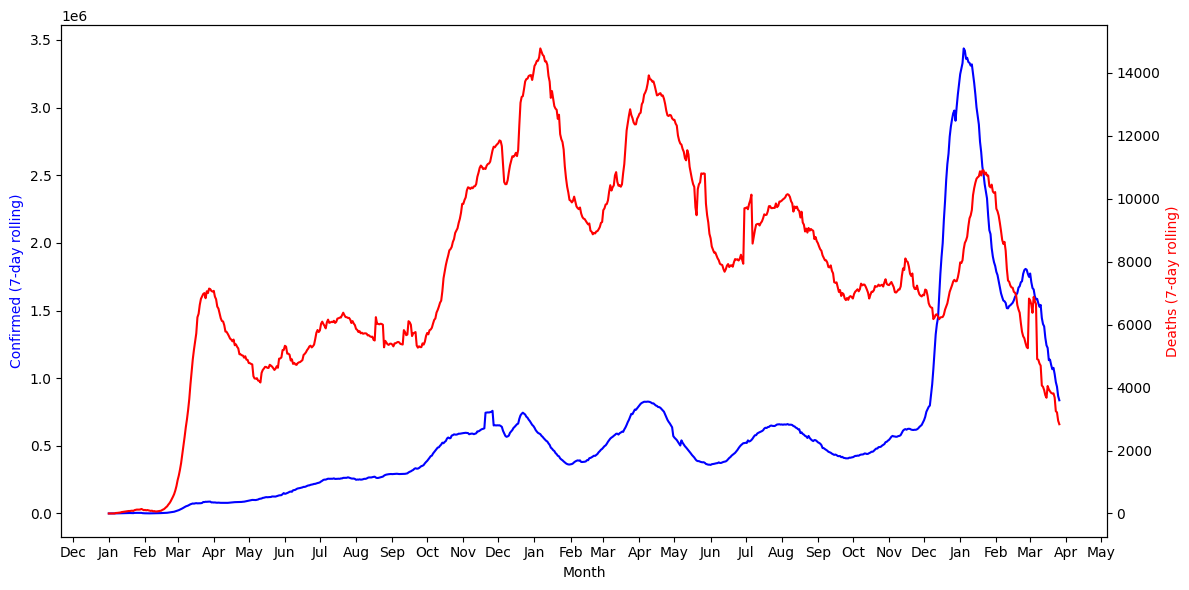

In [25]:

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(global_total['Date'], global_total['Confirmed_daily_seven_rolling'], label='Confirmed (7-day rolling)', color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Confirmed (7-day rolling)', color='blue')
ax2 = ax1.twinx()
ax2.plot(global_total['Date'], global_total['Deaths_daily_seven_rolling'], label='Deaths (7-day rolling)', color='red')
ax2.set_ylabel('Deaths (7-day rolling)', color='red')
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b'))
ax1.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())

fig.tight_layout()

plt.show()